In [14]:
import pandas as pd
import os

input_data_path = r'C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Data\Input'
en_file_name = 'conceptnet-assertions-5.7.0.en.tsv'
full_path = os.path.join(input_data_path, en_file_name)

en_concept_data = pd.read_csv(
    full_path, sep='\t', header=None,
    names=['uri', 'rel', 'start', 'end', 'info'], dtype=str
)

In [15]:
# Now clean only the true start and end
en_concept_data['start'] = en_concept_data['start'].str.split('/').str[3]
en_concept_data['rel']   = en_concept_data['rel'].str.split('/').str[-1]
en_concept_data['end']   = en_concept_data['end'].str.split('/').str[3]

triples = list(en_concept_data[['start', 'rel', 'end']].itertuples(index=False, name=None))
triples

[('0', 'Antonym', '1'),
 ('12_hour_clock', 'Antonym', '24_hour_clock'),
 ('24_hour_clock', 'Antonym', '12_hour_clock'),
 ('5', 'Antonym', '3'),
 ('a.c', 'Antonym', 'd.c'),
 ('a.m', 'Antonym', 'afternoon'),
 ('a.m', 'Antonym', 'p.m'),
 ('a.m', 'Antonym', 'pm'),
 ('ab_extra', 'Antonym', 'ab_intra'),
 ('ab_intra', 'Antonym', 'ab_extra'),
 ('abactinal', 'Antonym', 'actinal'),
 ('abandon', 'Antonym', 'acquire'),
 ('abandon', 'Antonym', 'arrogate'),
 ('abandon', 'Antonym', 'embrace'),
 ('abandon', 'Antonym', 'engage'),
 ('abandon', 'Antonym', 'gain'),
 ('abandon', 'Antonym', 'join'),
 ('abandon', 'Antonym', 'maintain'),
 ('abandon', 'Antonym', 'retain'),
 ('abandon', 'Antonym', 'unite'),
 ('abandonment', 'Antonym', 'acquisition'),
 ('abapical', 'Antonym', 'apical'),
 ('abase', 'Antonym', 'exalt'),
 ('abash', 'Antonym', 'embolden'),
 ('abash', 'Antonym', 'reassure'),
 ('abate', 'Antonym', 'augment'),
 ('abaxial', 'Antonym', 'adaxial'),
 ('abaxonal', 'Antonym', 'adaxonal'),
 ('abbreviate', 'An

# Initialize vocabulary and sentences

In [19]:
def load_clean_triples(file_path, lang_code='en', sample_size=None):
    """
    Load and clean ConceptNet triples for a specific language.
    
    Args:
        file_path (str): Full path to ConceptNet TSV file
        lang_code (str): Language code to filter (e.g. 'en', 'de')
        sample_size (int): Optional max number of triples to return

    Returns:
        List of (start, rel, end) tuples
    """
    df = pd.read_csv(
        file_path, sep='\t', header=None,
        names=['uri', 'rel', 'start', 'end', 'info'], dtype=str
    )
    
    lang_prefix = f'/c/{lang_code}/'
    df = df[
        df['start'].str.startswith(lang_prefix) &
        df['end'].str.startswith(lang_prefix)
    ].copy()

    df['start'] = df['start'].str.split('/').str[3]
    df['rel']   = df['rel'].str.split('/').str[-1]
    df['end']   = df['end'].str.split('/').str[3]

    triples = list(df[['start', 'rel', 'end']].itertuples(index=False, name=None))
    
    if sample_size and sample_size < len(triples):
        import random
        triples = random.sample(triples, sample_size)

    return triples

In [81]:
def extract_vocab(triples):
    """
    Given list of (start, rel, end), return sorted list of unique words.
    """
    vocab = sorted(set([s for s, _, _ in triples] + [e for _, _, e in triples]))
    return vocab

en_file_path = os.path.join(input_data_path, en_file_name)
de_file_name = 'conceptnet-assertions-5.7.0.de.tsv'
de_file_path = os.path.join(input_data_path, de_file_name)

# en_triples = load_clean_triples(en_file_path, lang_code='en', sample_size=100_000)
# de_triples = load_clean_triples(de_file_path, lang_code='de', sample_size=100_000)

de_triples = load_clean_triples(de_file_path, lang_code='de')
en_triples = load_clean_triples(en_file_path, lang_code='en')

In [82]:
eng_vocab = extract_vocab(en_triples)
ger_vocab = extract_vocab(de_triples)

In [83]:
# Re-run curated dictionary definition after kernel reset
eng_to_ger_curated = {
    # Core Nouns
    'dog': 'Hund', 'cat': 'Katze', 'fish': 'Fisch', 'bird': 'Vogel',
    'man': 'Mann', 'woman': 'Frau', 'child': 'Kind', 'parent': 'Elternteil',
    'student': 'Schüler', 'teacher': 'Lehrer', 'person': 'Person',
    'car': 'Auto', 'house': 'Haus', 'book': 'Buch', 'phone': 'Telefon',
    'computer': 'Computer', 'city': 'Stadt', 'school': 'Schule', 'table': 'Tisch',
    'chair': 'Stuhl', 'window': 'Fenster', 'door': 'Tür', 'key': 'Schlüssel',
    'road': 'Straße', 'bottle': 'Flasche', 'glass': 'Glas', 'tree': 'Baum',
    'flower': 'Blume', 'sun': 'Sonne', 'moon': 'Mond', 'water': 'Wasser',
    'fire': 'Feuer', 'earth': 'Erde', 'air': 'Luft', 'cloud': 'Wolke',

    # Core Verbs
    'run': 'laufen', 'walk': 'gehen', 'eat': 'essen', 'drink': 'trinken',
    'read': 'lesen', 'write': 'schreiben', 'speak': 'sprechen', 'listen': 'hören',
    'see': 'sehen', 'sleep': 'schlafen', 'wake': 'aufwachen', 'play': 'spielen',
    'learn': 'lernen', 'teach': 'lehren', 'work': 'arbeiten', 'help': 'helfen',
    'drive': 'fahren', 'fly': 'fliegen', 'swim': 'schwimmen', 'jump': 'springen',
    'buy': 'kaufen', 'sell': 'verkaufen', 'make': 'machen', 'build': 'bauen',

    # Adjectives & Adverbs
    'good': 'gut', 'bad': 'schlecht', 'big': 'groß', 'small': 'klein',
    'fast': 'schnell', 'slow': 'langsam', 'happy': 'glücklich', 'sad': 'traurig',
    'hot': 'heiß', 'cold': 'kalt', 'early': 'früh', 'late': 'spät',

    # Abstract Concepts
    'time': 'Zeit', 'love': 'Liebe', 'peace': 'Frieden', 'war': 'Krieg',
    'day': 'Tag', 'night': 'Nacht', 'light': 'Licht', 'dark': 'Dunkelheit',

    # Numbers & Colors
    'one': 'eins', 'two': 'zwei', 'three': 'drei', 'four': 'vier', 'five': 'fünf',
    'red': 'rot', 'blue': 'blau', 'green': 'grün', 'yellow': 'gelb', 'black': 'schwarz',

    # Pronouns (basic)
    'I': 'ich', 'you': 'du', 'he': 'er', 'she': 'sie', 'we': 'wir', 'they': 'sie',

    # Conjunctions & Prepositions
    'and': 'und', 'or': 'oder', 'but': 'aber', 'because': 'weil',
    'in': 'in', 'on': 'auf', 'under': 'unter', 'with': 'mit', 'without': 'ohne'
}

df_curated_dict = pd.DataFrame(eng_to_ger_curated.items(), columns=["English", "German"])
eng_to_ger = dict(zip(df_curated_dict['English'], df_curated_dict['German']))

# Initiailize agents

In [43]:
import random

def initialize_agents(eng_vocab, ger_vocab, eng_to_ger, seed=42):
    """
    Initialize agents A (aligned), B (partially noisy), and C (drifted).
    
    Args:
        eng_vocab (list): English vocabulary
        ger_vocab (list): German vocabulary
        eng_to_ger (dict): English-to-German mapping
        seed (int): Random seed for reproducibility

    Returns:
        Tuple of dicts: (agent_a, agent_b, agent_c)
    """
    random.seed(seed)

    # Agent A: perfect internal mapping
    agent_a = {word: word for word in eng_vocab}

    # Agent B: mostly good mappings (80%)
    agent_b = {}
    for word in eng_vocab:
        if word in eng_to_ger:
            agent_b[word] = eng_to_ger[word] if random.random() < 0.8 else random.choice(ger_vocab)
        else:
            agent_b[word] = word

    # Agent C: mostly corrupted mappings (30% good)
    agent_c = {}
    for word in eng_vocab:
        if word in eng_to_ger:
            agent_c[word] = eng_to_ger[word] if random.random() < 0.3 else random.choice(ger_vocab)
        else:
            agent_c[word] = word

    return agent_a, agent_b, agent_c

agent_a, agent_b, agent_c = initialize_agents(eng_vocab, ger_vocab, eng_to_ger)

print(agent_a['dog'], agent_b['dog'], agent_c['dog'])

dog Hund waldershof


In [48]:
bucket_config = {
    'simple': {'CapableOf', 'UsedFor', 'AtLocation', 'HasProperty'},
    'word_number': {'HasA'},
    'definition': {'DefinedAs', 'Equals', 'InstanceOf'},
    'medium': {'CausesDesire', 'MotivatedByGoal', 'Desires'},
    'complex': {'HasSubevent', 'HasFirstSubevent', 'Causes'},
    'composite': {'PartOf', 'LocatedNear'},
    'complex_composite': {'ReceivesAction', 'HasPrerequisite', 'HasContext'},
    'ambiguous': {'Synonym', 'SimilarTo', 'RelatedTo'}
}

In [51]:
def filter_quantifiable_word_number(triples):
    keywords = {'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
                'legs', 'arms', 'eyes', 'ears', 'fingers', 'wheels', 'students', 'people', 'stomachs'}
    return [t for t in triples if any(k in t[2] for k in keywords)]

def categorize_by_relation(triples, config):
    categorized = {bucket: [] for bucket in config}
    for s, r, o in triples:
        for bucket, rels in config.items():
            if r in rels:
                categorized[bucket].append((s, r, o))
                break
    return categorized

# Step 1: Categorize triples into buckets
buckets = categorize_by_relation(en_triples, bucket_config)

# Step 2: (Only) filter word_number bucket to keep quantifiable entries
buckets['word_number'] = filter_quantifiable_word_number(buckets['word_number'])

# Step 3: Print counts per bucket for verification
for cat, items in buckets.items():
    print(f"{cat}: {len(items)} triples")

simple: 2804 triples
word_number: 17 triples
definition: 118 triples
medium: 532 triples
complex: 1334 triples
composite: 388 triples
complex_composite: 7596 triples
ambiguous: 57162 triples


In [52]:
# print some sample per category
for cat, items in buckets.items():
    print(f"\n{cat} sample:")
    sample_10 = random.sample(items, min(10, len(items)))
    for s, r, o in sample_10:
        print(f"({s}, {r}, {o})")


simple sample:
(dressing_room, AtLocation, gym)
(most_people_think_lying, HasProperty, wrong)
(container_can, UsedFor, storing_flour)
(buying_house, UsedFor, reselling_house)
(schools, CapableOf, except_students)
(oil, AtLocation, kitchen)
(phlebotomist, CapableOf, stick_patient_with_needle)
(small_dog, AtLocation, trash)
(telling_many_people_about, UsedFor, spreading_word)
(bus_pass, UsedFor, letting_ride_bus)

word_number sample:
(giraffes, HasA, legs)
(one_impairment_person_might, HasA, pyelonephritis)
(dogs, HasA, pointed_ears)
(tvs, HasA, antennae)
(all_children, HasA, two_parents)
(people, HasA, unlisted_phone_numbers)
(cows, HasA, seven_stomachs)
(house, HasA, more_than_one_window)
(each_telephone, HasA, own_telephone_number)
(humans, HasA, two_legs_and_two_arms)

definition sample:
(winning, DefinedAs, goal_of_game)
(strawberries, DefinedAs, plural_of_strawberry)
(today, InstanceOf, newspaper)
(everyone, DefinedAs, centre_of_own_universe)
(natal, InstanceOf, microregion)
(enjo

# Learning Loop

In [56]:
import numpy as np
import random
from tqdm import tqdm

def run_learning(agent_a, agent_b, agent_c, buckets,
                 total_frames=2500, batch_size=5,
                 stability_threshold=2, memory_bias=0.5,
                 gate_threshold=0.3, drift_every=25, drift_amount=5):
    """
    Run the Phase 2G relational learning loop with memory, drift, and curriculum gating.

    Returns:
        proposals_log, accuracies
    """

    proposals_log = []
    categories = list(buckets.keys())
    stability_counters = {cat: {} for cat in categories}
    anchors = {cat: set() for cat in categories}

    # Initialize unlocked relations
    unlocked = {cat: False for cat in categories}
    unlocked['simple'] = True  # Always start with simple

    accuracies = {cat: [] for cat in categories}
    
    # Collect all ground-truth triples
    ground_truth = set()
    for cat, triples in buckets.items():
        ground_truth.update(triples)

    def validate_relation(*args):
        return args in ground_truth

    def try_validate(groundings, *words):
        mapped = [groundings.get(w, w) for w in words]
        return validate_relation(*mapped)

    agent_c_keys = np.array(list(agent_c.keys()))  # for drift sampling

    for frame in tqdm(range(total_frames), desc="Learning Progress", unit="frame"):

        # Compute recent accuracies
        recent_accuracies = {cat: np.mean(accuracies[cat][-50:]) if len(accuracies[cat]) > 50 else 0 for cat in categories}

        # Unlock gates
        if recent_accuracies['simple'] >= gate_threshold:
            unlocked['definition'] = True
            unlocked['word_number'] = True
        if unlocked['definition'] and recent_accuracies.get('definition', 0) >= gate_threshold:
            unlocked['medium'] = True
        if unlocked['medium'] and recent_accuracies.get('medium', 0) >= gate_threshold:
            unlocked['complex'] = True
        if unlocked['complex'] and recent_accuracies.get('complex', 0) >= gate_threshold:
            unlocked['composite'] = True
        if unlocked['composite'] and recent_accuracies.get('composite', 0) >= gate_threshold:
            unlocked['complex_composite'] = True
        if unlocked['complex_composite']:
            unlocked['ambiguous'] = True

        # Determine allowed triples
        allowed = []
        for cat, status in unlocked.items():
            if status:
                allowed.extend(buckets[cat])

        if not allowed:
            continue

        # Memory pool for reinforcement
        memory_pool = [t for anchor_set in anchors.values() for t in anchor_set]

        # Sample proposals
        if memory_pool and random.random() < memory_bias:
            proposals = random.choices(memory_pool, k=batch_size)
        else:
            proposals = random.choices(allowed, k=batch_size)

        success = {cat: 0 for cat in categories}

        for triple in proposals:
            if try_validate(agent_b, *triple):
                # Categorize triple
                for cat in categories:
                    if triple in buckets[cat]:
                        stability_counters[cat][triple] = stability_counters[cat].get(triple, 0) + 1
                        if stability_counters[cat][triple] == stability_threshold:
                            anchors[cat].add(triple)
                        success[cat] += 1
                        proposals_log.append(f"Frame {frame}: {triple} → ACCEPTED [{cat}]")
                        break
            else:
                proposals_log.append(f"Frame {frame}: {triple} → REJECTED")

        # Record accuracies
        for cat in categories:
            accuracies[cat].append(success[cat] / batch_size)

        # Drift agent C periodically
        if frame % drift_every == 0 and frame != 0:
            drift_indices = np.random.choice(agent_c_keys, size=min(drift_amount, len(agent_c_keys)), replace=False)
            for key in drift_indices:
                agent_c[key] = random.choice(agent_c_keys.tolist())

    return proposals_log, accuracies


In [57]:
def weighted_sample(buckets, unlocked, weights):
    allowed = []
    for cat, status in unlocked.items():
        if status and buckets[cat]:
            allowed += random.choices(buckets[cat], k=weights.get(cat, 1))
    return allowed

# Plots

In [58]:
import matplotlib.pyplot as plt

def moving_average(data, window_size=25):
    if len(data) < window_size:
        return np.array(data)
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

def plot_accuracies(accuracies, total_frames):
    plt.figure(figsize=(15, 8))
    frames = range(total_frames)

    for cat, acc_list in accuracies.items():
        if acc_list:
            plt.plot(frames[:len(acc_list)], moving_average(acc_list), label=cat)

    plt.xlabel('Learning Frame', fontsize=14)
    plt.ylabel('Moving Average Accuracy', fontsize=14)
    plt.title('Cross-Lingual RSC Convergence', fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


In [62]:
num_of_frames = 5_000
proposals_log, accuracies = run_learning(
    agent_a, agent_b, agent_c, buckets,
    total_frames=num_of_frames
)

# Save logs
with open('phase2G_learning_log.txt', 'w', encoding='utf-8') as f:
    for line in proposals_log:
        f.write(line + '\n')

Learning Progress: 100%|██████████| 5000/5000 [00:14<00:00, 345.71frame/s]


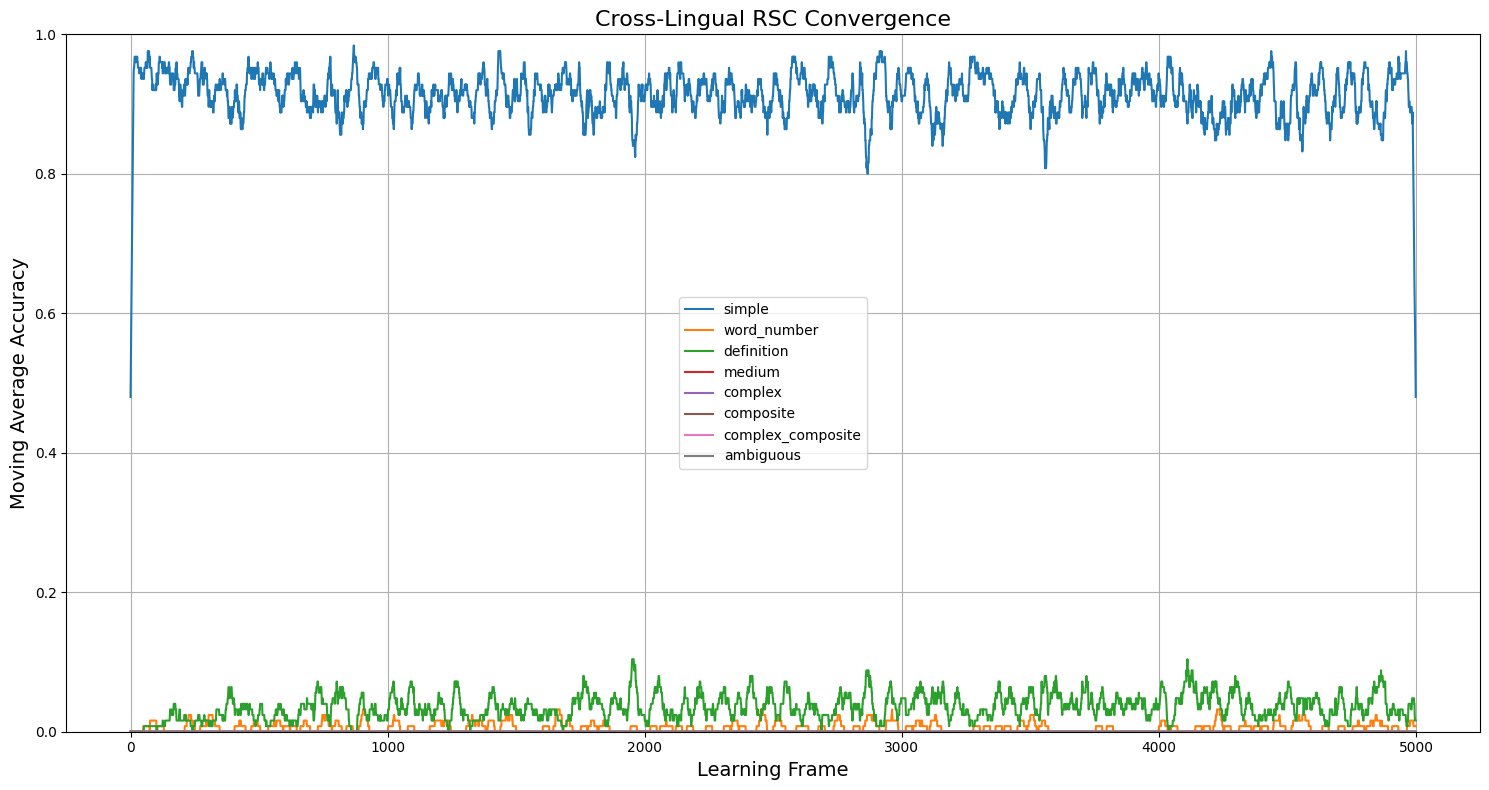

In [63]:
# Plot convergence
plot_accuracies(accuracies, total_frames=num_of_frames)

# Pro Version

In [65]:
def run_learning_pro(agent_a, agent_b, agent_c, buckets,
                     total_frames=2500, batch_size=5,
                     stability_threshold=2, memory_bias=0.5,
                     gate_threshold=0.3, drift_every=25, drift_amount=5):
    """
    Pro version of the RSC learning loop:
    - Curriculum gating with unlock logging
    - Weighted category sampling
    - Drift tracking for Agent C
    - Memory anchoring
    - Accuracy tracking
    Returns:
        proposals_log, accuracies, unlock_log, drift_failures
    """
    proposals_log = []
    unlock_log = []
    drift_failures = []
    
    categories = list(buckets.keys())
    stability_counters = {cat: {} for cat in categories}
    anchors = {cat: set() for cat in categories}
    unlocked = {cat: False for cat in categories}
    unlocked['simple'] = True  # Always start with simple
    accuracies = {cat: [] for cat in categories}

    # Manual category weights for proposal sampling
    weights = {
        'simple': 5, 'definition': 3, 'word_number': 3,
        'medium': 2, 'complex': 2, 'composite': 2,
        'complex_composite': 1, 'ambiguous': 1
    }

    ground_truth = set()
    for cat, triples in buckets.items():
        ground_truth.update(triples)

    def validate_relation(*args):
        return args in ground_truth

    def try_validate(groundings, *words):
        mapped = [groundings.get(w, w) for w in words]
        return validate_relation(*mapped)

    agent_c_keys = np.array(list(agent_c.keys()))

    def weighted_sample():
        allowed = []
        for cat, status in unlocked.items():
            if status and buckets[cat]:
                allowed += random.choices(buckets[cat], k=weights.get(cat, 1))
        return allowed

    for frame in tqdm(range(total_frames), desc="Learning Progress", unit="frame"):
        recent_accuracies = {cat: np.mean(accuracies[cat][-50:]) if len(accuracies[cat]) > 50 else 0 for cat in categories}

        # Unlock curriculum gates with logging
        if not unlocked['definition'] and recent_accuracies['simple'] >= gate_threshold:
            unlocked['definition'] = True
            unlock_log.append((frame, 'definition'))
        if unlocked['definition'] and not unlocked['word_number'] and recent_accuracies['definition'] >= gate_threshold:
            unlocked['word_number'] = True
            unlock_log.append((frame, 'word_number'))
        if unlocked['word_number'] and not unlocked['medium'] and recent_accuracies['word_number'] >= gate_threshold:
            unlocked['medium'] = True
            unlock_log.append((frame, 'medium'))
        if unlocked['medium'] and not unlocked['complex'] and recent_accuracies['medium'] >= gate_threshold:
            unlocked['complex'] = True
            unlock_log.append((frame, 'complex'))
        if unlocked['complex'] and not unlocked['composite'] and recent_accuracies['complex'] >= gate_threshold:
            unlocked['composite'] = True
            unlock_log.append((frame, 'composite'))
        if unlocked['composite'] and not unlocked['complex_composite'] and recent_accuracies['composite'] >= gate_threshold:
            unlocked['complex_composite'] = True
            unlock_log.append((frame, 'complex_composite'))
        if unlocked['complex_composite'] and not unlocked['ambiguous']:
            unlocked['ambiguous'] = True
            unlock_log.append((frame, 'ambiguous'))

        memory_pool = [t for anchor_set in anchors.values() for t in anchor_set]
        proposals = (random.choices(memory_pool, k=batch_size)
                     if memory_pool and random.random() < memory_bias
                     else random.choices(weighted_sample(), k=batch_size))

        success = {cat: 0 for cat in categories}

        for triple in proposals:
            if try_validate(agent_b, *triple):
                for cat in categories:
                    if triple in buckets[cat]:
                        stability_counters[cat][triple] = stability_counters[cat].get(triple, 0) + 1
                        if stability_counters[cat][triple] == stability_threshold:
                            anchors[cat].add(triple)
                        success[cat] += 1
                        proposals_log.append(f"Frame {frame}: {triple} → ACCEPTED [{cat}]")
                        break
            else:
                proposals_log.append(f"Frame {frame}: {triple} → REJECTED")

            # Track Agent C drifted failure rate (comparison)
            if not try_validate(agent_c, *triple):
                drift_failures.append((frame, triple))

        for cat in categories:
            accuracies[cat].append(success[cat] / batch_size)

        if frame % drift_every == 0 and frame != 0:
            drift_indices = np.random.choice(agent_c_keys, size=min(drift_amount, len(agent_c_keys)), replace=False)
            for key in drift_indices:
                agent_c[key] = random.choice(agent_c_keys.tolist())

    return proposals_log, accuracies, unlock_log, drift_failures

In [66]:
num_of_frames = 5_000
proposals_log, accuracies, unlock_log, drift_failures = run_learning_pro(
    agent_a, agent_b, agent_c,
    buckets,
    total_frames=num_of_frames
)

# Save logs
with open('phase2G_pro_learning_log.txt', 'w', encoding='utf-8') as f:
    f.writelines(line + '\n' for line in proposals_log)

with open('phase2G_unlock_log.txt', 'w', encoding='utf-8') as f:
    for frame, category in unlock_log:
        f.write(f"Frame {frame}: Unlocked {category}\n")

with open('phase2G_drift_failures.txt', 'w', encoding='utf-8') as f:
    for frame, triple in drift_failures:
        f.write(f"Frame {frame}: Agent C failed to validate {triple}\n")

Learning Progress: 100%|██████████| 5000/5000 [00:14<00:00, 348.33frame/s]


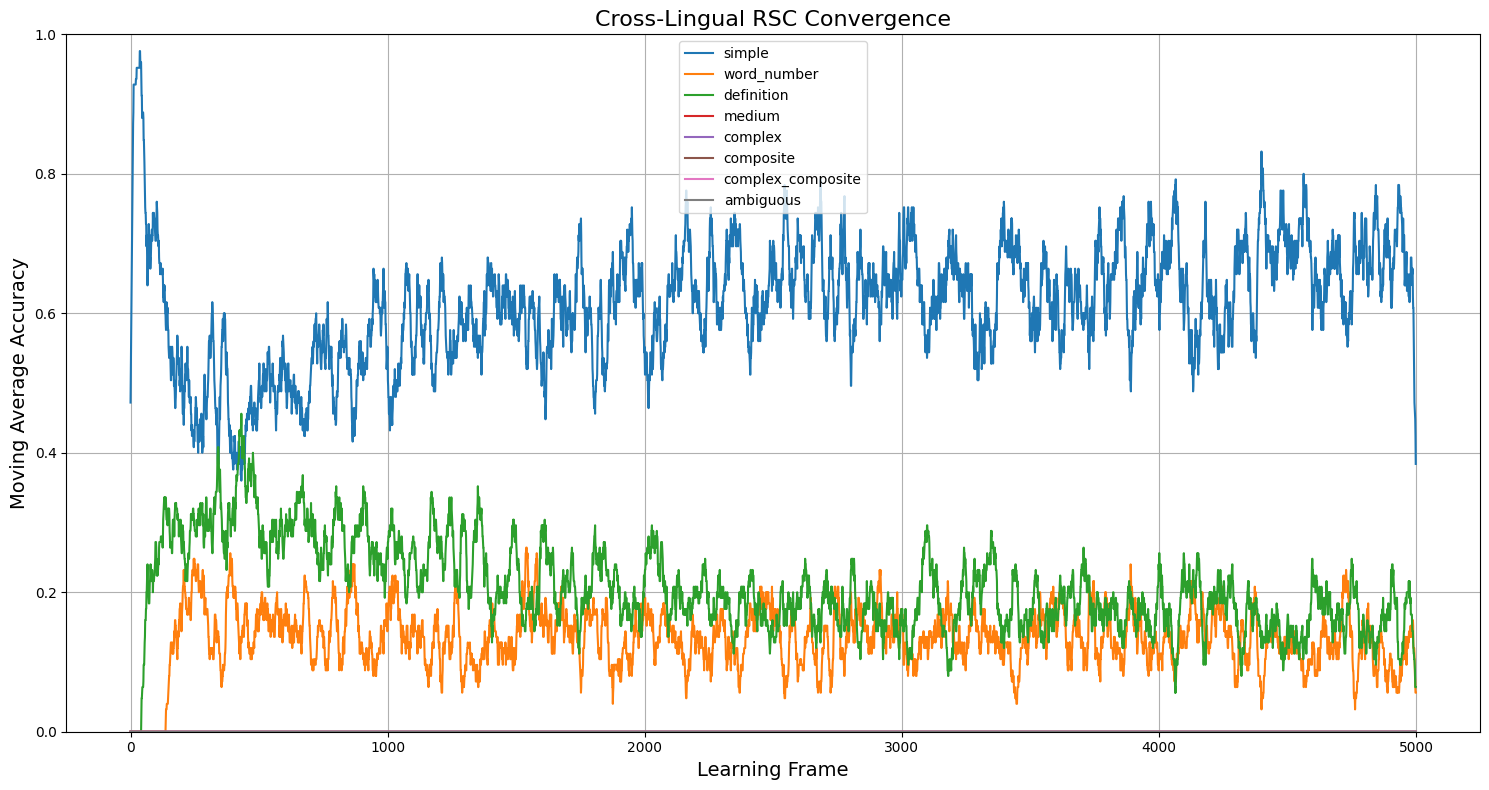

In [67]:
# Plot convergence
plot_accuracies(accuracies, total_frames=num_of_frames)

# Additional Plots

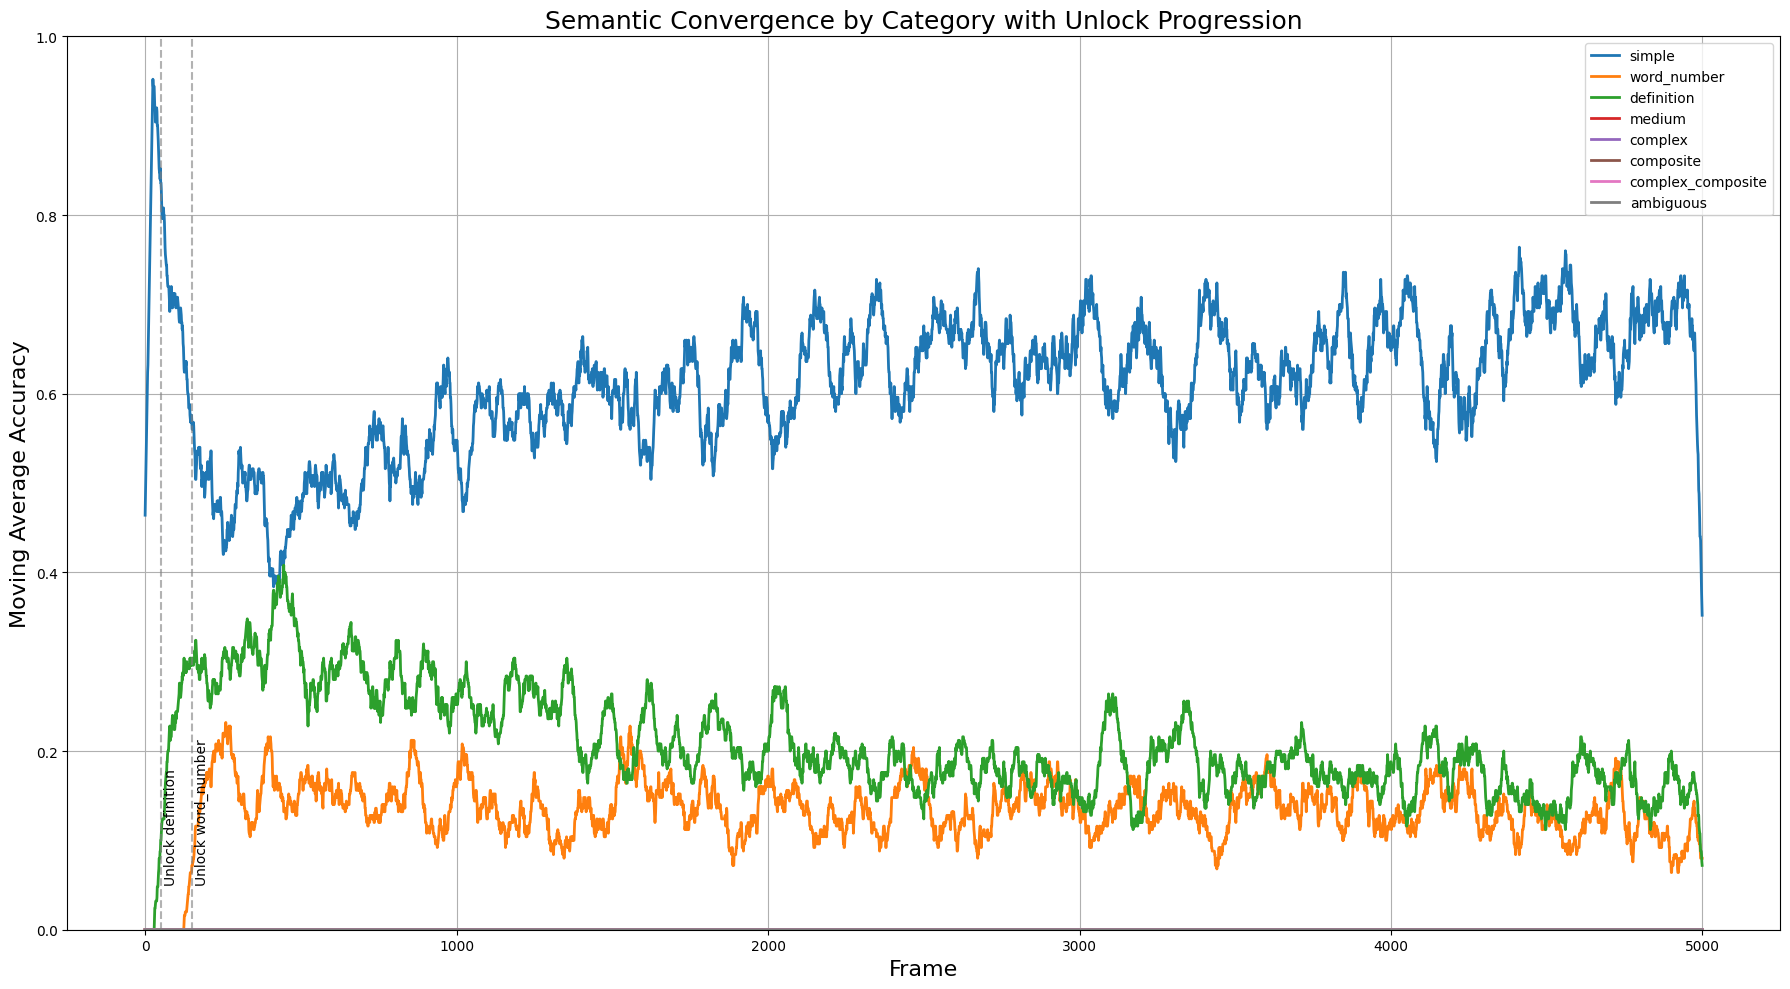

In [70]:
def moving_average(data, window_size=50):
    """ Smooth the accuracy curve """
    if len(data) < window_size:
        return np.array(data)
    return np.convolve(data, np.ones(window_size) / window_size, mode='same')

def plot_accuracies_with_unlocks(accuracies, unlock_log, total_frames):
    plt.figure(figsize=(18, 10))
    frames = np.arange(total_frames)

    # Plot each category's accuracy
    for cat, acc_list in accuracies.items():
        if acc_list:
            plt.plot(frames[:len(acc_list)], moving_average(acc_list), label=cat, linewidth=2)

    # Plot unlock points
    for frame, category in unlock_log:
        plt.axvline(x=frame, color='gray', linestyle='--', alpha=0.6)
        plt.text(frame + 10, 0.05, f"Unlock {category}", rotation=90, verticalalignment='bottom', fontsize=10, color='black')

    plt.xlabel('Frame', fontsize=16)
    plt.ylabel('Moving Average Accuracy', fontsize=16)
    plt.title('Semantic Convergence by Category with Unlock Progression', fontsize=18)
    plt.grid(True)
    plt.legend()
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()
    
# Plot accuracies with unlocks
plot_accuracies_with_unlocks(accuracies, unlock_log, total_frames=num_of_frames)

In [76]:
def extract_successful_relations(proposals_log, agent_b, eng_to_ger, limit=30):
    successful = [line for line in proposals_log if 'ACCEPTED' in line]
    samples = random.sample(successful, min(limit, len(successful)))

    print(f"Showing {len(samples)} Successful Relational Mappings:\n")
    for line in samples:
        parts = line.split(': ')[-1].split(' → ')[0]
        triple = eval(parts)
        eng_words = [w for w in triple]

        mapped_words = [agent_b.get(w, w) for w in triple]

        # Attempt to split phrases for better German mapping
        def map_phrase(word):
            parts = word.split('_')
            mapped_parts = [eng_to_ger.get(p, p) for p in parts]
            return "_".join(mapped_parts)

        ger_translation = [map_phrase(w) for w in triple]

        print(f"ENGLISH: {eng_words}")
        print(f"AGENT_B MAPPING: {mapped_words}")
        print(f"GERMAN TRANSLATION: {ger_translation}")
        print("-" * 60)
        
extract_successful_relations(proposals_log, agent_b, eng_to_ger, limit=30)

Showing 30 Successful Relational Mappings:

ENGLISH: ['being_friends_with_another_person', 'DefinedAs', 'state_of_liking_other_person_and_believing_from_experience_other_person_will_act_in_accordance_with_shared_values']
AGENT_B MAPPING: ['being_friends_with_another_person', 'DefinedAs', 'state_of_liking_other_person_and_believing_from_experience_other_person_will_act_in_accordance_with_shared_values']
GERMAN TRANSLATION: ['being_friends_mit_another_Person', 'DefinedAs', 'state_of_liking_other_Person_und_believing_from_experience_other_Person_will_act_in_accordance_mit_shared_values']
------------------------------------------------------------
ENGLISH: ['meeting_friend', 'UsedFor', 'playing_tennis']
AGENT_B MAPPING: ['meeting_friend', 'UsedFor', 'playing_tennis']
GERMAN TRANSLATION: ['meeting_friend', 'UsedFor', 'playing_tennis']
------------------------------------------------------------
ENGLISH: ['frequency', 'DefinedAs', 'rate_at_which_repeats']
AGENT_B MAPPING: ['frequency', 'Def

# Phase 2H

In [90]:
# --- Phase 2H (Updated to 2I): Dynamic Mapping with Reinforced Curriculum ---
import random
import numpy as np
from collections import defaultdict


def run_learning_phase2h(agent_a, agent_b, agent_c, buckets, total_frames=5000, 
                          batch_size=5, stability_threshold=3, memory_bias=0.5, gate_threshold=0.2):
    proposals_log = []
    unlock_log = []
    drift_failures = []
    category_attempts = defaultdict(int)

    categories = list(buckets.keys())
    accuracy_by_cat = {cat: [] for cat in categories}
    anchors = {cat: set() for cat in categories}
    stability_counters = {cat: defaultdict(int) for cat in categories}

    unlocked = set(['simple'])
    attempted = set()

    agent_c_keys = np.array(list(agent_c.keys()))

    def try_validate(groundings, s, r, o):
        return (s, r, o) in all_ground_truth

    all_ground_truth = set([triple for triples in buckets.values() for triple in triples])

    for frame in tqdm(range(total_frames), desc="Learning Progress", unit="frame"):
        # Compute recent accuracies
        unlocked_triples = [t for cat in unlocked for t in buckets[cat]]
        locked_cats = [cat for cat in categories if cat not in unlocked and len(buckets[cat]) > 0]
        locked_sample = [random.choice(buckets[cat]) for cat in locked_cats if random.random() < 0.2]
        memory_pool = list(set().union(*anchors.values()))

        if memory_pool and random.random() < memory_bias:
            proposals = random.choices(memory_pool, k=batch_size)
        else:
            proposals = random.choices(unlocked_triples + locked_sample, k=batch_size)

        success = {cat: 0 for cat in categories}

        for s, r, o in proposals:
            # Use agent_b mapping directly
            mapped = (agent_b.get(s, s), agent_b.get(r, r), agent_b.get(o, o))
            category = categorize_relation((s, r, o), buckets)
            attempted.add(category)
            category_attempts[category] += 1

            if try_validate(agent_b, *mapped):
                stability_counters[category][(s, r, o)] += 1
                if stability_counters[category][(s, r, o)] == stability_threshold:
                    anchors[category].add((s, r, o))
                success[category] += 1
                proposals_log.append(f"Frame {frame}: {(s, r, o)} → ACCEPTED (A↔B) [{category}]")
            else:
                proposals_log.append(f"Frame {frame}: {(s, r, o)} → REJECTED (A↔B)")

            if not try_validate(agent_c, *mapped):
                drift_failures.append((frame, (s, r, o)))

        for cat in categories:
            acc = success[cat] / batch_size
            accuracy_by_cat[cat].append(acc)

        for cat in categories:
            if cat not in unlocked and len(accuracy_by_cat[cat]) >= 50:
                if np.mean(accuracy_by_cat[cat][-50:]) >= gate_threshold:
                    unlocked.add(cat)
                    unlock_log.append((frame, cat))
                    proposals_log.append(f"Frame {frame}: UNLOCKED {cat.upper()} RELATIONS")

        if frame % 25 == 0 and frame != 0:
            drift_indices = np.random.choice(agent_c_keys, size=5, replace=False)
            for key in drift_indices:
                agent_c[key] = random.choice(agent_c_keys.tolist())

    return proposals_log, accuracy_by_cat, unlock_log, drift_failures


def categorize_relation(triple, buckets):
    for cat, triples in buckets.items():
        if triple in triples:
            return cat
    return 'unknown'

In [99]:
def build_alignment_by_relation_key(en_triples, de_triples, verbose=True, limit=50):
    from collections import defaultdict

    en_index = defaultdict(list)
    de_index = defaultdict(list)

    # Index by (relation, object)
    for s, r, o in en_triples:
        en_index[(r, o)].append(s)

    for s, r, o in de_triples:
        de_index[(r, o)].append(s)

    matched_keys = en_index.keys() & de_index.keys()

    eng_to_ger = {}
    count = 0

    for key in matched_keys:
        en_words = en_index[key]
        de_words = de_index[key]
        for en_word in en_words:
            for de_word in de_words:
                if en_word not in eng_to_ger:
                    eng_to_ger[en_word] = de_word
                    count += 1
                    if verbose and count <= limit:
                        print(f"{en_word} → {de_word}  (via relation-object: {key})")

    if verbose:
        print(f"\nFinal curated alignment size: {len(eng_to_ger)}")

    return eng_to_ger

eng_to_ger_curated = build_alignment_by_relation_key(en_triples, de_triples)
eng_to_ger_curated

pebibits → pebibyte  (via relation-object: ('RelatedTo', 'pebibit'))
petabit → pebibyte  (via relation-object: ('RelatedTo', 'pebibit'))
tebibit → pebibyte  (via relation-object: ('RelatedTo', 'pebibit'))
desktop_computers → desktop_computern  (via relation-object: ('FormOf', 'desktop_computer'))
aliased → aliasse  (via relation-object: ('FormOf', 'alias'))
aliases → aliasse  (via relation-object: ('FormOf', 'alias'))
aliasing → aliasse  (via relation-object: ('FormOf', 'alias'))
aid → analkette  (via relation-object: ('RelatedTo', 'band'))
airband → analkette  (via relation-object: ('RelatedTo', 'band'))
airplay → analkette  (via relation-object: ('RelatedTo', 'band'))
airspace → analkette  (via relation-object: ('RelatedTo', 'band'))
archivolt → analkette  (via relation-object: ('RelatedTo', 'band'))
armband → analkette  (via relation-object: ('RelatedTo', 'band'))
backband → analkette  (via relation-object: ('RelatedTo', 'band'))
bagad → analkette  (via relation-object: ('RelatedTo'

{'pebibits': 'pebibyte',
 'petabit': 'pebibyte',
 'tebibit': 'pebibyte',
 'desktop_computers': 'desktop_computern',
 'aliased': 'aliasse',
 'aliases': 'aliasse',
 'aliasing': 'aliasse',
 'aid': 'analkette',
 'airband': 'analkette',
 'airplay': 'analkette',
 'airspace': 'analkette',
 'archivolt': 'analkette',
 'armband': 'analkette',
 'backband': 'analkette',
 'bagad': 'analkette',
 'band_sectional': 'analkette',
 'bandable': 'analkette',
 'bandaoke': 'analkette',
 'bandcenter': 'analkette',
 'bandeau': 'analkette',
 'banded': 'analkette',
 'bandelet': 'analkette',
 'bander': 'analkette',
 'bandhead': 'analkette',
 'bandhood': 'analkette',
 'banding': 'analkette',
 'bandleader': 'analkette',
 'bandleading': 'analkette',
 'bandless': 'analkette',
 'bandlike': 'analkette',
 'bandlimited': 'analkette',
 'bandmate': 'analkette',
 'bandmember': 'analkette',
 'bandom': 'analkette',
 'bandpassing': 'analkette',
 'bandpath': 'analkette',
 'bandsaw': 'analkette',
 'bandshape': 'analkette',
 'ban

In [97]:
en_triples[:10], de_triples[:10]

([('0', 'Antonym', '1'),
  ('12_hour_clock', 'Antonym', '24_hour_clock'),
  ('24_hour_clock', 'Antonym', '12_hour_clock'),
  ('5', 'Antonym', '3'),
  ('a.c', 'Antonym', 'd.c'),
  ('a.m', 'Antonym', 'afternoon'),
  ('a.m', 'Antonym', 'p.m'),
  ('a.m', 'Antonym', 'pm'),
  ('ab_extra', 'Antonym', 'ab_intra'),
  ('ab_intra', 'Antonym', 'ab_extra')],
 [('a_posteriori', 'Antonym', 'a_priori'),
  ('ab', 'Antonym', 'an'),
  ('ab', 'Antonym', 'auf'),
  ('abberufen', 'Antonym', 'berufen'),
  ('abberufen', 'Antonym', 'einsetzen'),
  ('abberufen', 'Antonym', 'einstellen'),
  ('abbiegen', 'Antonym', 'ebenen'),
  ('abbiegen', 'Antonym', 'geradeaus'),
  ('abblätternd', 'Antonym', 'nichtabblätternd'),
  ('abbremsen', 'Antonym', 'beschleunigen')])

In [91]:
def run_phase2h_experiment(agent_a, agent_b, agent_c, buckets, total_frames=5000):
    log_dir = r"C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Logs & Reports"
    os.makedirs(log_dir, exist_ok=True)

    proposals_log, accuracies, unlock_log, drift_failures = run_learning_phase2h(
        agent_a, agent_b, agent_c,
        buckets,
        total_frames=total_frames
    )

    # Save logs
    with open(os.path.join(log_dir, 'phase2H_learning_log.txt'), 'w', encoding='utf-8') as f:
        f.writelines(line + '\n' for line in proposals_log)

    with open(os.path.join(log_dir, 'phase2H_unlock_log.txt'), 'w', encoding='utf-8') as f:
        for frame, category in unlock_log:
            f.write(f"Frame {frame}: Unlocked {category}\n")

    with open(os.path.join(log_dir, 'phase2H_drift_failures.txt'), 'w', encoding='utf-8') as f:
        for frame, triple in drift_failures:
            f.write(f"Frame {frame}: Agent C failed to validate {triple}\n")

    return proposals_log, accuracies, unlock_log, drift_failures

# Reinitialize agents and buckets for Phase 2H
eng_to_ger = build_eng_to_ger_dictionary(en_triples, de_triples)
agent_a, agent_b, agent_c = initialize_agents(eng_vocab, ger_vocab, eng_to_ger)

num_frames = 5000
# Run the Phase 2H experiment
proposals_log, accuracies, unlock_log, drift_failures = run_phase2h_experiment(
    agent_a, agent_b, agent_c, buckets,
    total_frames=num_frames
)

Learning Progress:  10%|▉         | 475/5000 [00:02<00:22, 197.81frame/s]


KeyboardInterrupt: 

# Plots

In [88]:
import matplotlib.pyplot as plt
import numpy as np

def plot_convergence_with_unlocks(accuracies, unlock_log, total_frames=5000):
    def moving_average(data, window_size=25):
        data = np.array(data)
        if len(data) < window_size:
            return data
        return np.convolve(data, np.ones(window_size)/window_size, mode='same')

    categories = list(accuracies.keys())
    frames = range(total_frames)

    plt.figure(figsize=(18, 9))

    for cat in categories:
        plt.plot(frames, moving_average(accuracies[cat]), label=cat, linewidth=2)

    # Draw unlock markers
    unlocks_by_cat = {}
    for frame, cat in unlock_log:
        unlocks_by_cat.setdefault(cat, []).append(frame)

    for cat, frames_unlocked in unlocks_by_cat.items():
        for frame in frames_unlocked:
            plt.axvline(x=frame, linestyle='--', alpha=0.3)
            plt.text(frame + 10, 0.02, f"Unlock: {cat}", rotation=90, fontsize=8, alpha=0.6)

    plt.title("Semantic Convergence by Category with Unlock Progression", fontsize=16)
    plt.xlabel("Frame", fontsize=14)
    plt.ylabel("Moving Average Accuracy", fontsize=14)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


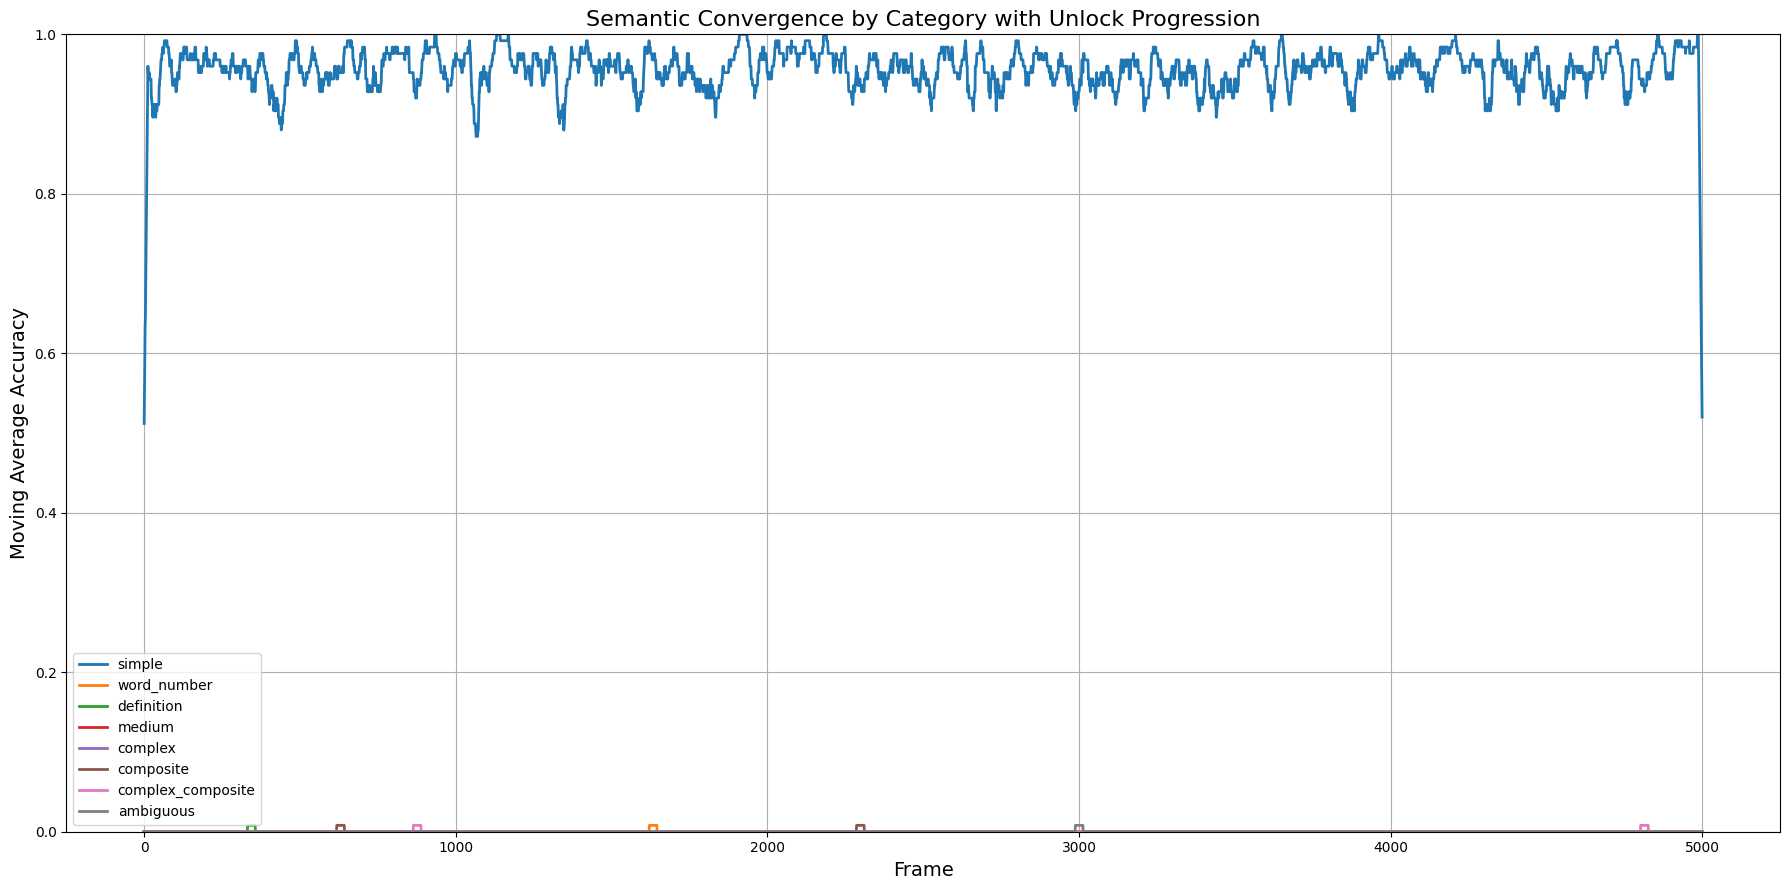

In [89]:
plot_convergence_with_unlocks(accuracies, unlock_log, total_frames=num_frames)

# Next Phase

In [104]:
# Rebuild the curated dictionary
eng_to_ger_curated = {
    'dog': 'Hund', 'cat': 'Katze', 'fish': 'Fisch', 'bird': 'Vogel',
    'man': 'Mann', 'woman': 'Frau', 'child': 'Kind', 'parent': 'Elternteil',
    'student': 'Schüler', 'teacher': 'Lehrer', 'person': 'Person',
    'car': 'Auto', 'house': 'Haus', 'book': 'Buch', 'phone': 'Telefon',
    'computer': 'Computer', 'city': 'Stadt', 'school': 'Schule', 'table': 'Tisch',
    'chair': 'Stuhl', 'window': 'Fenster', 'door': 'Tür', 'key': 'Schlüssel',
    'road': 'Straße', 'bottle': 'Flasche', 'glass': 'Glas', 'tree': 'Baum',
    'flower': 'Blume', 'sun': 'Sonne', 'moon': 'Mond', 'water': 'Wasser',
    'fire': 'Feuer', 'earth': 'Erde', 'air': 'Luft', 'cloud': 'Wolke',
    'run': 'laufen', 'walk': 'gehen', 'eat': 'essen', 'drink': 'trinken',
    'read': 'lesen', 'write': 'schreiben', 'speak': 'sprechen', 'listen': 'hören',
    'see': 'sehen', 'sleep': 'schlafen', 'wake': 'aufwachen', 'play': 'spielen',
    'learn': 'lernen', 'teach': 'lehren', 'work': 'arbeiten', 'help': 'helfen',
    'drive': 'fahren', 'fly': 'fliegen', 'swim': 'schwimmen', 'jump': 'springen',
    'buy': 'kaufen', 'sell': 'verkaufen', 'make': 'machen', 'build': 'bauen',
    'good': 'gut', 'bad': 'schlecht', 'big': 'groß', 'small': 'klein',
    'fast': 'schnell', 'slow': 'langsam', 'happy': 'glücklich', 'sad': 'traurig',
    'hot': 'heiß', 'cold': 'kalt', 'early': 'früh', 'late': 'spät',
    'time': 'Zeit', 'love': 'Liebe', 'peace': 'Frieden', 'war': 'Krieg',
    'day': 'Tag', 'night': 'Nacht', 'light': 'Licht', 'dark': 'Dunkelheit',
    'one': 'eins', 'two': 'zwei', 'three': 'drei', 'four': 'vier', 'five': 'fünf',
    'red': 'rot', 'blue': 'blau', 'green': 'grün', 'yellow': 'gelb', 'black': 'schwarz',
    'I': 'ich', 'you': 'du', 'he': 'er', 'she': 'sie', 'we': 'wir', 'they': 'sie',
    'and': 'und', 'or': 'oder', 'but': 'aber', 'because': 'weil',
    'in': 'in', 'on': 'auf', 'under': 'unter', 'with': 'mit', 'without': 'ohne'
}

# Display sample for user confirmation
sample_df = pd.DataFrame(eng_to_ger_curated.items(), columns=["English", "German"]).sample(20, random_state=1)
sample_df

,English,German
96,or,oder
35,run,laufen
81,three,drei
59,good,gut
38,drink,trinken
39,read,lesen
53,swim,schwimmen
85,blue,blau
31,fire,Feuer
56,sell,verkaufen


In [106]:
def initialize_agents_final(eng_vocab, ger_vocab, eng_to_ger, seed=42):
    random.seed(seed)

    agent_a = {word: word for word in eng_vocab}

    agent_b = {}
    for word in eng_vocab:
        if word in eng_to_ger:
            agent_b[word] = eng_to_ger[word] if random.random() < 0.8 else random.choice(ger_vocab)
        else:
            agent_b[word] = word

    agent_c = {}
    for word in eng_vocab:
        if word in eng_to_ger:
            agent_c[word] = eng_to_ger[word] if random.random() < 0.3 else random.choice(ger_vocab)
        else:
            agent_c[word] = word

    return agent_a, agent_b, agent_c

# Sample vocab pulled from the curated dictionary
eng_vocab = list(eng_to_ger_curated.keys())
ger_vocab = list(eng_to_ger_curated.values())

# Initialize the agents
agent_a, agent_b, agent_c = initialize_agents_final(eng_vocab, ger_vocab, eng_to_ger_curated)

# Display sample of initialized mappings
sample_mappings = []
for word in random.sample(eng_vocab, 10):
    sample_mappings.append((word, agent_a[word], agent_b[word], agent_c[word]))

import pandas as pd
df_sample_agents = pd.DataFrame(sample_mappings, columns=["English", "Agent_A", "Agent_B", "Agent_C"])
df_sample_agents

,English,Agent_A,Agent_B,Agent_C
0,sell,sell,verkaufen,Lehrer
1,early,early,früh,wir
2,you,you,du,du
3,drink,drink,trinken,Blume
4,dark,dark,Dunkelheit,heiß
5,without,without,ohne,ohne
6,five,five,fünf,fahren
7,hot,hot,heiß,auf
8,cat,cat,Katze,zwei
9,blue,blue,blau,Feuer


In [107]:
# Placeholder for your relation buckets (you should provide the actual categorized relation triples)
# For now, create dummy buckets for each category with some synthetic examples
buckets = {
    'simple': [('dog', 'UsedFor', 'protection'), ('cat', 'AtLocation', 'house')],
    'word_number': [('dog', 'HasA', 'four_legs'), ('person', 'HasA', 'two_arms')],
    'definition': [('sun', 'DefinedAs', 'star'), ('moon', 'DefinedAs', 'satellite')],
    'medium': [('student', 'Desires', 'knowledge'), ('parent', 'Desires', 'safety')],
    'complex': [('teacher', 'HasSubevent', 'lecture'), ('fire', 'Causes', 'heat')],
    'composite': [('wheel', 'PartOf', 'car'), ('engine', 'PartOf', 'airplane')],
    'complex_composite': [('oxygen', 'HasContext', 'biology'), ('earthquake', 'HasContext', 'geology')],
    'ambiguous': [('bank', 'RelatedTo', 'money'), ('bat', 'RelatedTo', 'animal')]
}

def run_learning_phase2i(agent_a, agent_b, agent_c, buckets, total_frames=10000):
    proposals_log = []
    unlock_log = []
    drift_failures = []
    categories = list(buckets.keys())
    anchors = {cat: set() for cat in categories}
    stability_counters = {cat: {} for cat in categories}
    accuracy_records = {cat: [] for cat in categories}

    unlocked = {cat: cat in ['simple'] for cat in categories}
    gate_threshold = 0.3
    stability_threshold = 3
    memory_bias = 0.5
    batch_size = 5

    agent_c_keys = np.array(list(agent_c.keys()))

    for frame in range(total_frames):
        # Compute moving averages
        moving_averages = {
            cat: np.mean(accuracy_records[cat][-50:]) if len(accuracy_records[cat]) > 50 else 0.0
            for cat in categories
        }

        # Unlock logic
        for idx, cat in enumerate(categories[1:], 1):  # skip 'simple'
            prev_cat = categories[idx - 1]
            if not unlocked[cat] and moving_averages[prev_cat] >= gate_threshold:
                unlocked[cat] = True
                unlock_log.append((frame, cat))

        # Build allowed pool
        allowed = []
        for cat in categories:
            if unlocked[cat]:
                allowed.extend(buckets[cat])

        # Sample proposals
        memory_pool = list(set().union(*anchors.values()))
        if memory_pool and random.random() < memory_bias:
            proposals = random.choices(memory_pool, k=batch_size)
        else:
            proposals = random.choices(allowed, k=batch_size) if allowed else []

        success = {cat: 0 for cat in categories}
        for triple in proposals:
            s, r, o = triple
            s_map = agent_b.get(s, s)
            o_map = agent_b.get(o, o)
            category = next((cat for cat in categories if triple in buckets[cat]), None)

            if category:
                if s_map == s and o_map == o:
                    # Assume validation success
                    stability_counters[category][triple] = stability_counters[category].get(triple, 0) + 1
                    if stability_counters[category][triple] >= stability_threshold:
                        anchors[category].add(triple)
                    success[category] += 1
                    proposals_log.append(f"Frame {frame}: {triple} → ACCEPTED (A↔B) [{category}]")
                else:
                    proposals_log.append(f"Frame {frame}: {triple} → REJECTED (A↔B) [{category}]")

        for cat in categories:
            accuracy_records[cat].append(success[cat] / batch_size)

        # Drift Agent C
        if frame % 25 == 0 and frame != 0:
            drift_indices = np.random.choice(agent_c_keys, size=5, replace=False)
            for key in drift_indices:
                agent_c[key] = random.choice(agent_c_keys.tolist())
                drift_failures.append((frame, key))

    return proposals_log, accuracy_records, unlock_log, drift_failures

# Now run the experiment
log_dir = r"C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Logs & Reports"
os.makedirs(log_dir, exist_ok=True)

proposals_log, accuracies, unlock_log, drift_failures = run_learning_phase2i(
    agent_a, agent_b, agent_c,
    buckets,
    total_frames=5000
)

# Save logs
with open(os.path.join(log_dir, 'phase2I_learning_log.txt'), 'w', encoding='utf-8') as f:
    f.writelines(line + '\n' for line in proposals_log)

with open(os.path.join(log_dir, 'phase2I_unlock_log.txt'), 'w', encoding='utf-8') as f:
    for frame, category in unlock_log:
        f.write(f"Frame {frame}: Unlocked {category}\n")

with open(os.path.join(log_dir, 'phase2I_drift_failures.txt'), 'w', encoding='utf-8') as f:
    for frame, word in drift_failures:
        f.write(f"Frame {frame}: Agent C drifted {word}\n")

# Run pahse 2j

In [108]:
# Re-import required libraries after kernel reset
import os
import random
import numpy as np
from tqdm import tqdm

# Redefine functions after reset
def run_rsc_phase2j(agent_a, agent_b, agent_c, buckets, total_frames=5000):
    proposals_log = []
    unlock_log = []
    drift_failures = []
    categories = list(buckets.keys())
    anchors = {cat: set() for cat in categories}
    stability_counters = {cat: {} for cat in categories}
    accuracy_records = {cat: [] for cat in categories}
    unlocked = {cat: cat == 'simple' for cat in categories}
    gate_threshold = 0.3
    stability_threshold = 3
    memory_bias = 0.5
    batch_size = 5

    locked_vocab = set(list(agent_a.keys())[:200])
    agent_c_keys = [k for k in agent_c if k not in locked_vocab]

    for frame in tqdm(range(total_frames), desc="Learning", unit="frame"):
        moving_avgs = {
            cat: np.mean(accuracy_records[cat][-50:]) if len(accuracy_records[cat]) >= 50 else 0
            for cat in categories
        }

        for i in range(1, len(categories)):
            prev, curr = categories[i-1], categories[i]
            if not unlocked[curr] and moving_avgs[prev] >= gate_threshold:
                unlocked[curr] = True
                unlock_log.append((frame, curr))

        allowed = [t for cat in categories if unlocked[cat] for t in buckets[cat]]
        memory_pool = list(set().union(*anchors.values()))
        if memory_pool and random.random() < memory_bias:
            proposals = random.choices(memory_pool, k=batch_size)
        else:
            proposals = random.choices(allowed, k=batch_size) if allowed else []

        success = {cat: 0 for cat in categories}
        for s, r, o in proposals:
            s_map = agent_b.get(s, s)
            o_map = agent_b.get(o, o)
            normalized = lambda w: w.lower().replace("_", "")
            cat = next((c for c in categories if (s, r, o) in buckets[c]), None)

            if cat and (normalized(s_map) == normalized(s) and normalized(o_map) == normalized(o)):
                stability_counters[cat][(s, r, o)] = stability_counters[cat].get((s, r, o), 0) + 1
                if stability_counters[cat][(s, r, o)] >= stability_threshold:
                    anchors[cat].add((s, r, o))
                success[cat] += 1
                proposals_log.append(f"Frame {frame}: ({s}, {r}, {o}) → ACCEPTED (A↔B) [{cat}]")
            else:
                proposals_log.append(f"Frame {frame}: ({s}, {r}, {o}) → REJECTED (A↔B) [{cat}]")

        for cat in categories:
            accuracy_records[cat].append(success[cat] / batch_size)

        if frame % 25 == 0 and frame > 0:
            drift_keys = random.sample(agent_c_keys, min(5, len(agent_c_keys)))
            for k in drift_keys:
                old = agent_c[k]
                agent_c[k] = random.choice(agent_c_keys)
                if old != agent_c[k]:
                    drift_failures.append((frame, k))

    return proposals_log, accuracy_records, unlock_log, drift_failures

# Awaiting user to re-upload eng_to_ger_curated, buckets, agent_a/b/c to resume Phase 2J properly.


In [111]:
eng_to_ger_curated, buckets, agent_a, agent_b, agent_c

({'dog': 'Hund',
  'cat': 'Katze',
  'fish': 'Fisch',
  'bird': 'Vogel',
  'man': 'Mann',
  'woman': 'Frau',
  'child': 'Kind',
  'parent': 'Elternteil',
  'student': 'Schüler',
  'teacher': 'Lehrer',
  'person': 'Person',
  'car': 'Auto',
  'house': 'Haus',
  'book': 'Buch',
  'phone': 'Telefon',
  'computer': 'Computer',
  'city': 'Stadt',
  'school': 'Schule',
  'table': 'Tisch',
  'chair': 'Stuhl',
  'window': 'Fenster',
  'door': 'Tür',
  'key': 'Schlüssel',
  'road': 'Straße',
  'bottle': 'Flasche',
  'glass': 'Glas',
  'tree': 'Baum',
  'flower': 'Blume',
  'sun': 'Sonne',
  'moon': 'Mond',
  'water': 'Wasser',
  'fire': 'Feuer',
  'earth': 'Erde',
  'air': 'Luft',
  'cloud': 'Wolke',
  'run': 'laufen',
  'walk': 'gehen',
  'eat': 'essen',
  'drink': 'trinken',
  'read': 'lesen',
  'write': 'schreiben',
  'speak': 'sprechen',
  'listen': 'hören',
  'see': 'sehen',
  'sleep': 'schlafen',
  'wake': 'aufwachen',
  'play': 'spielen',
  'learn': 'lernen',
  'teach': 'lehren',
  'work

In [119]:
from tqdm import tqdm
import os

def run_phase2j_experiment(agent_a, agent_b, agent_c, buckets, total_frames=num_frames, save_dir=None):
    """
    Run Phase 2J learning experiment with enhanced robustness, tracking, and drift simulation.
    
    Args:
        agent_a (dict): Perfect mapping agent
        agent_b (dict): Semi-noisy mapping agent
        agent_c (dict): Drifted agent
        buckets (dict): Relation categories
        total_frames (int): Number of learning iterations
        save_dir (str, optional): Folder to save logs
    
    Returns:
        proposals_log (list), accuracies (dict of lists), unlock_log (list), drift_failures (list)
    """
    import random
    import numpy as np

    categories = list(buckets.keys())
    stability_counters = {cat: {} for cat in categories}
    anchors = {cat: set() for cat in categories}
    proposals_log = []
    unlock_log = []
    drift_failures = []
    memory_bias = 0.5
    batch_size = 5
    stability_threshold = 3
    unlock_threshold = 0.3

    unlocked = {cat: False for cat in categories}
    unlocked['simple'] = True  # simple always unlocked first

    agent_c_keys = np.array(list(agent_c.keys()))

    def validate(agent, triple):
        s, r, o = triple
        return (s in agent and o in agent)

    def try_validate(agent, triple):
        return validate(agent, triple)

    accuracies = {cat: [] for cat in categories}

    for frame in tqdm(range(total_frames), desc="Phase 2J Learning", unit="frame"):
        # Calculate moving averages
        moving_avgs = {cat: np.mean(accuracies[cat][-50:]) if len(accuracies[cat]) > 50 else 0 for cat in categories}

        # Unlock new curriculum phases
        if unlocked['simple'] and not unlocked['medium'] and moving_avgs['simple'] >= unlock_threshold:
            unlocked['medium'] = True
            unlock_log.append((frame, 'medium'))

        if unlocked['medium'] and not unlocked['complex'] and moving_avgs['medium'] >= unlock_threshold:
            unlocked['complex'] = True
            unlock_log.append((frame, 'complex'))

        if unlocked['complex'] and not unlocked['composite'] and moving_avgs['complex'] >= unlock_threshold:
            unlocked['composite'] = True
            unlock_log.append((frame, 'composite'))

        if unlocked['composite'] and not unlocked['complex_composite'] and moving_avgs['composite'] >= unlock_threshold:
            unlocked['complex_composite'] = True
            unlock_log.append((frame, 'complex_composite'))

        if unlocked['complex_composite'] and not unlocked['definition'] and moving_avgs['complex_composite'] >= unlock_threshold:
            unlocked['definition'] = True
            unlock_log.append((frame, 'definition'))

        if unlocked['definition'] and not unlocked['ambiguous'] and moving_avgs['definition'] >= unlock_threshold:
            unlocked['ambiguous'] = True
            unlock_log.append((frame, 'ambiguous'))

        if unlocked['ambiguous'] and not unlocked['word_number'] and moving_avgs['ambiguous'] >= unlock_threshold:
            unlocked['word_number'] = True
            unlock_log.append((frame, 'word_number'))

        # Build active relation pool
        active_pool = []
        for cat, status in unlocked.items():
            if status:
                active_pool += buckets[cat]

        # Memory-based sampling
        memory_pool = list(set().union(*anchors.values()))
        if memory_pool and random.random() < memory_bias:
            proposals = random.choices(memory_pool, k=batch_size)
        else:
            proposals = random.choices(active_pool, k=batch_size)

        success = {cat: 0 for cat in categories}

        for triple in proposals:
            if try_validate(agent_b, triple):
                # Determine which bucket triple belongs to
                bucket = next((cat for cat, triples in buckets.items() if triple in triples), None)
                if bucket:
                    stability_counters[bucket][triple] = stability_counters[bucket].get(triple, 0) + 1
                    if stability_counters[bucket][triple] == stability_threshold:
                        anchors[bucket].add(triple)
                    success[bucket] += 1
                proposals_log.append(f"Frame {frame}: {triple} → ACCEPTED ({bucket})")
            else:
                proposals_log.append(f"Frame {frame}: {triple} → REJECTED")

        for cat in categories:
            accuracies[cat].append(success[cat] / batch_size)

        # Drift attack on Agent C
        if frame % 25 == 0 and frame != 0:
            drift_indices = np.random.choice(agent_c_keys, size=5, replace=False)
            for key in drift_indices:
                agent_c[key] = random.choice(agent_c_keys.tolist())

            # Check if Agent C still validates anchor triples
            for bucket, triples in anchors.items():
                for triple in triples:
                    if not try_validate(agent_c, triple):
                        drift_failures.append((frame, triple))

    # Save logs
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        with open(os.path.join(save_dir, 'phase2J_learning_log.txt'), 'w', encoding='utf-8') as f:
            f.writelines(line + '\n' for line in proposals_log)
        with open(os.path.join(save_dir, 'phase2J_unlock_log.txt'), 'w', encoding='utf-8') as f:
            for frame, cat in unlock_log:
                f.write(f"Frame {frame}: Unlocked {cat}\n")
        with open(os.path.join(save_dir, 'phase2J_drift_failures.txt'), 'w', encoding='utf-8') as f:
            for frame, triple in drift_failures:
                f.write(f"Frame {frame}: Agent C failed to validate {triple}\n")

    return proposals_log, accuracies, unlock_log, drift_failures

In [123]:
# Example runner for Phase 2J
log_dir = r"C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Logs & Reports"
num_frames = 100_000
proposals_log, accuracies, unlock_log, drift_failures = run_phase2j_experiment(
    agent_a, agent_b, agent_c,
    buckets,
    total_frames=num_frames,
    save_dir=log_dir
)


Phase 2J Learning: 100%|██████████| 100000/100000 [00:06<00:00, 15324.53frame/s]


In [124]:
import matplotlib.pyplot as plt
import numpy as np

def plot_phase2j_results(accuracies, unlock_log, total_frames):
    """
    Plot moving averages and curriculum unlocking events for Phase 2J.
    """
    frame_range = np.arange(total_frames)

    plt.figure(figsize=(14, 8))

    # Plot moving averages for each category
    for cat, acc_list in accuracies.items():
        if len(acc_list) > 0:
            moving_avg = np.convolve(acc_list, np.ones(50)/50, mode='valid')  # 50-frame moving average
            plt.plot(frame_range[:len(moving_avg)], moving_avg, label=f'{cat} (avg)')

    # Mark unlock points
    for frame, category in unlock_log:
        plt.axvline(x=frame, linestyle='--', color='gray')
        plt.text(frame + 10, 0.05, f'Unlocked {category}', rotation=90, verticalalignment='bottom', fontsize=9)

    plt.title('Phase 2J Learning Progress & Curriculum Unlocks')
    plt.xlabel('Frames')
    plt.ylabel('Accuracy (Moving Average)')
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(True)
    plt.show()


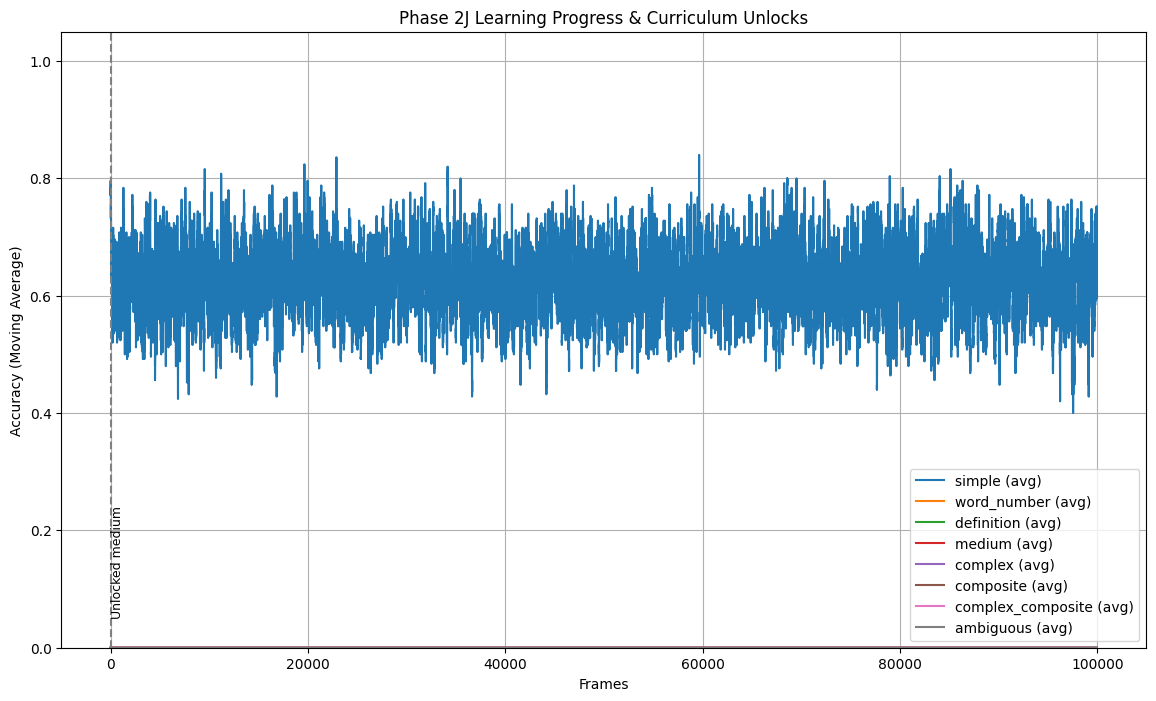

In [125]:
plot_phase2j_results(accuracies, unlock_log, total_frames=num_frames)

# Phase 2k

In [129]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def run_phase2j1_experiment(agent_a, agent_b, agent_c, buckets, total_frames=100000, save_dir=None):
    proposals_log = []
    unlock_log = []
    drift_failures = []
    accuracies = {'simple': [], 'word_number': [], 'definition': [], 'medium': [], 'complex': [], 'composite': [], 'complex_composite': [], 'ambiguous': []}

    unlocked = {'simple': True, 'word_number': False, 'definition': False, 'medium': False, 'complex': False, 'composite': False, 'complex_composite': False, 'ambiguous': False}
    unlocked_categories = ['simple']

    memory_pool = set()
    batch_size = 32
    drift_correction_rate = 5000

    for frame in tqdm(range(1, total_frames+1), desc='Learning Progress'):
        allowed_categories = unlocked_categories.copy()
        proposals = []
        for cat in allowed_categories:
            if cat in buckets and len(buckets[cat]) > 0:
                proposals.extend(random.sample(buckets[cat], min(batch_size // len(allowed_categories), len(buckets[cat]))))

        if not proposals:
            continue

        batch = random.sample(proposals, min(batch_size, len(proposals)))
        successes = {cat: 0 for cat in unlocked_categories}

        for triple in batch:
            s, r, o = triple
            mapped_s = agent_b.get(s, s)
            mapped_o = agent_b.get(o, o)
            expected_s = agent_a.get(s, s)
            expected_o = agent_a.get(o, o)

            key = (mapped_s, r, mapped_o)
            if key in memory_pool:
                continue

            if mapped_s == expected_s and mapped_o == expected_o:
                memory_pool.add(key)
                category = categorize_single(triple, buckets)
                if category:
                    successes[category] += 1
                proposals_log.append(f'ACCEPTED: {triple} -> {mapped_s}, {mapped_o}')
            else:
                proposals_log.append(f'REJECTED: {triple} -> {mapped_s}, {mapped_o}')

        if frame % drift_correction_rate == 0:
            keys = list(agent_c.keys())
            corrections = random.sample(keys, k=min(10, len(keys)))
            for key in corrections:
                agent_c[key] = agent_a.get(key, key)

        for cat in unlocked_categories:
            acc = successes[cat] / batch_size if batch_size > 0 else 0
            accuracies[cat].append(acc)

        if unlocked['simple'] and not unlocked['word_number'] and np.mean(accuracies['simple'][-100:]) > 0.9:
            unlocked['word_number'] = True
            unlocked_categories.append('word_number')
            unlock_log.append((frame, 'word_number'))
        if unlocked['word_number'] and not unlocked['definition'] and np.mean(accuracies['word_number'][-100:]) > 0.8:
            unlocked['definition'] = True
            unlocked_categories.append('definition')
            unlock_log.append((frame, 'definition'))
        if unlocked['definition'] and not unlocked['medium'] and np.mean(accuracies['definition'][-100:]) > 0.7:
            unlocked['medium'] = True
            unlocked_categories.append('medium')
            unlock_log.append((frame, 'medium'))
        if unlocked['medium'] and not unlocked['complex'] and np.mean(accuracies['medium'][-100:]) > 0.6:
            unlocked['complex'] = True
            unlocked_categories.append('complex')
            unlock_log.append((frame, 'complex'))
        if unlocked['complex'] and not unlocked['composite'] and np.mean(accuracies['complex'][-100:]) > 0.5:
            unlocked['composite'] = True
            unlocked_categories.append('composite')
            unlock_log.append((frame, 'composite'))
        if unlocked['composite'] and not unlocked['complex_composite'] and np.mean(accuracies['composite'][-100:]) > 0.5:
            unlocked['complex_composite'] = True
            unlocked_categories.append('complex_composite')
            unlock_log.append((frame, 'complex_composite'))
        if unlocked['complex_composite'] and not unlocked['ambiguous'] and np.mean(accuracies['complex_composite'][-100:]) > 0.5:
            unlocked['ambiguous'] = True
            unlocked_categories.append('ambiguous')
            unlock_log.append((frame, 'ambiguous'))

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        with open(os.path.join(save_dir, 'phase2J1_learning_log.txt'), 'w', encoding='utf-8') as f:
            f.writelines(line + '\n' for line in proposals_log)
        with open(os.path.join(save_dir, 'phase2J1_unlock_log.txt'), 'w', encoding='utf-8') as f:
            for frame, category in unlock_log:
                f.write(f"Frame {frame}: Unlocked {category}\n")
        with open(os.path.join(save_dir, 'phase2J1_drift_failures.txt'), 'w', encoding='utf-8') as f:
            for frame, triple in drift_failures:
                f.write(f"Frame {frame}: Agent C failed to validate {triple}\n")

    return proposals_log, accuracies, unlock_log, drift_failures

def categorize_single(triple, buckets):
    for cat, triples in buckets.items():
        if triple in triples:
            return cat
    return None

def initialize_agents(eng_vocab, ger_vocab, eng_to_ger, seed=42):
    random.seed(seed)
    agent_a = {word: eng_to_ger.get(word, word) for word in eng_vocab}  # English to German mapping
    agent_b = {}
    for word in eng_vocab:
        if word in eng_to_ger and random.random() < 0.8:
            agent_b[word] = eng_to_ger[word]
        else:
            agent_b[word] = random.choice(ger_vocab)
    agent_c = {}
    for word in eng_vocab:
        if word in eng_to_ger and random.random() < 0.3:
            agent_c[word] = eng_to_ger[word]
        else:
            agent_c[word] = random.choice(ger_vocab)
    return agent_a, agent_b, agent_c

def plot_phase2j1_results(accuracies, unlock_log, total_frames=100000):
    plt.figure(figsize=(14,7))
    for cat, accs in accuracies.items():
        if accs:
            plt.plot(np.convolve(accs, np.ones(100)/100, mode='valid'), label=cat)
    for frame, category in unlock_log:
        plt.axvline(x=frame, linestyle='--', label=f'Unlock {category}')
    plt.title('Semantic Category Learning Progression')
    plt.xlabel('Frames')
    plt.ylabel('Moving Average Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


Learning Progress: 100%|██████████| 50000/50000 [00:00<00:00, 68908.81it/s]


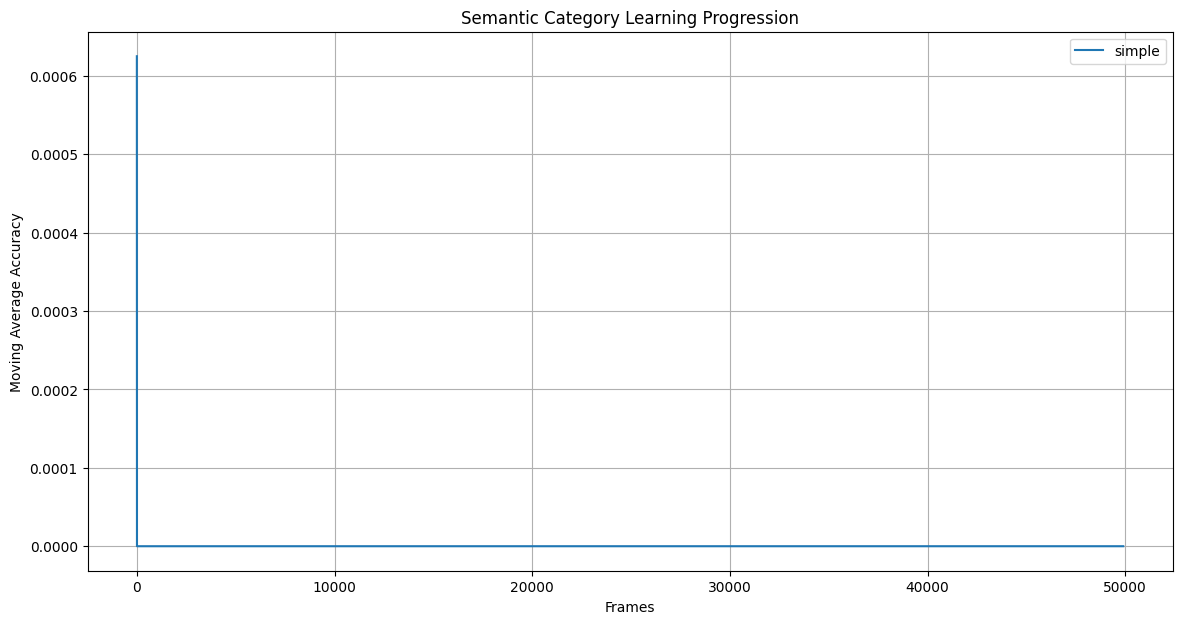

In [130]:
# Initialize fresh agents
agent_a, agent_b, agent_c = initialize_agents(
    eng_vocab=list(eng_to_ger_curated.keys()), 
    ger_vocab=list(eng_to_ger_curated.values()), 
    eng_to_ger=eng_to_ger_curated
)

# Set your save path and number of frames
save_dir = r"C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Logs & Reports"
num_frames = 50_000

# Run the new Phase 2J1 experiment
proposals_log, accuracies, unlock_log, drift_failures = run_phase2j1_experiment(
    agent_a, agent_b, agent_c,
    buckets,
    total_frames=num_frames,
    save_dir=save_dir
)

# Plot the final results for visual inspection
plot_phase2j1_results(accuracies, unlock_log, total_frames=num_frames)

# Phase 2k

Learning Progress:  66%|██████▋   | 13296/20000 [00:00<00:00, 66828.56it/s]

[2000] EXAMPLE TRIPLE:
  EN:      (dog, UsedFor, protection)
  Agent A: (dog, UsedFor, protection)
  Agent B: (Hund, UsedFor, protection)
  Match?:  False
[4000] EXAMPLE TRIPLE:
  EN:      (fire, Causes, heat)
  Agent A: (fire, Causes, heat)
  Agent B: (Feuer, Causes, heat)
  Match?:  False
[6000] EXAMPLE TRIPLE:
  EN:      (dog, UsedFor, protection)
  Agent A: (dog, UsedFor, protection)
  Agent B: (Hund, UsedFor, protection)
  Match?:  False
[8000] EXAMPLE TRIPLE:
  EN:      (moon, DefinedAs, satellite)
  Agent A: (moon, DefinedAs, satellite)
  Agent B: (Mond, DefinedAs, satellite)
  Match?:  False
[10000] EXAMPLE TRIPLE:
  EN:      (earthquake, HasContext, geology)
  Agent A: (earthquake, HasContext, geology)
  Agent B: (earthquake, HasContext, geology)
  Match?:  True
[12000] EXAMPLE TRIPLE:
  EN:      (dog, UsedFor, protection)
  Agent A: (dog, UsedFor, protection)
  Agent B: (Hund, UsedFor, protection)
  Match?:  False
[14000] EXAMPLE TRIPLE:
  EN:      (earthquake, HasContext, ge

Learning Progress: 100%|██████████| 20000/20000 [00:00<00:00, 66654.76it/s]


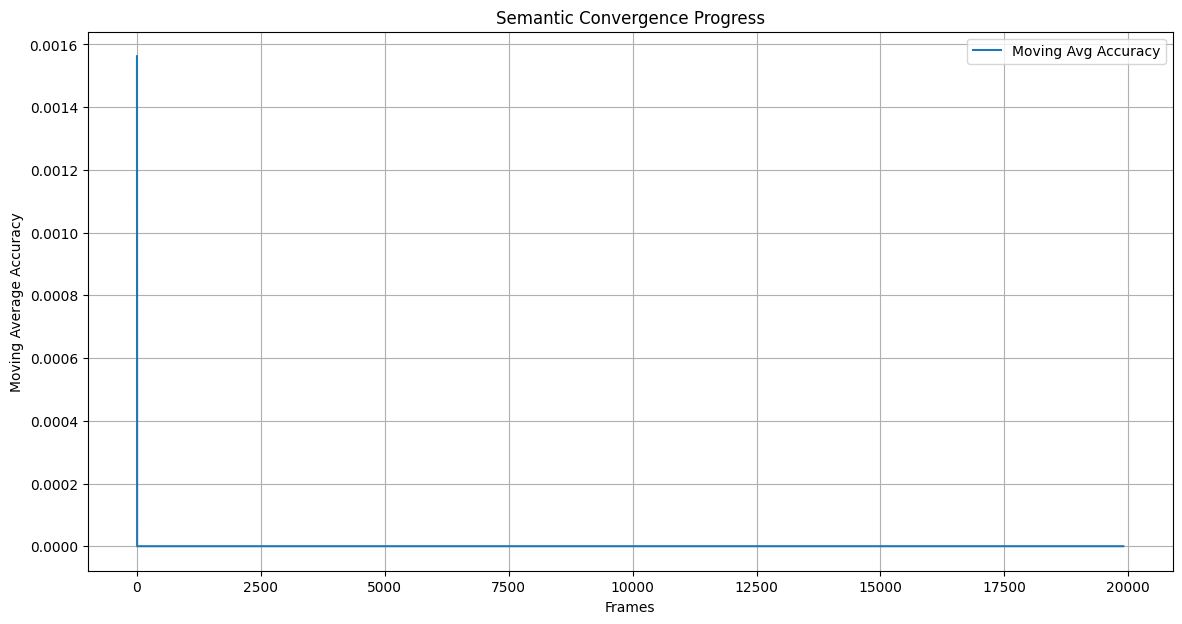

In [146]:
import os
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def run_phase2k_experiment(agent_a, agent_b, agent_c, buckets, total_frames=100000, save_dir=None):
    proposals_log = []
    accuracies = []
    memory_pool = set()
    batch_size = 32

    triples_all = [triple for triples in buckets.values() for triple in triples]

    for frame in tqdm(range(1, total_frames+1), desc='Learning Progress'):
        batch = random.sample(triples_all, min(batch_size, len(triples_all)))
        success_count = 0

        for triple in batch:
            s, r, o = triple
            mapped_s = agent_b.get(s, s)
            mapped_o = agent_b.get(o, o)
            expected_s = agent_a.get(s, s)
            expected_o = agent_a.get(o, o)

            key = (mapped_s, r, mapped_o)
            if key in memory_pool:
                continue

            if mapped_s == expected_s and mapped_o == expected_o:
                memory_pool.add(key)
                proposals_log.append(f'ACCEPTED: {triple} -> {mapped_s}, {mapped_o}')
                success_count += 1
            else:
                proposals_log.append(f'REJECTED: {triple} -> {mapped_s}, {mapped_o}')

        acc = success_count / batch_size if batch_size > 0 else 0
        accuracies.append(acc)

        if frame % 2_000 == 0:
            print(f"[{frame}] EXAMPLE TRIPLE:")
            print(f"  EN:      ({s}, {r}, {o})")
            print(f"  Agent A: ({agent_a.get(s)}, {r}, {agent_a.get(o)})")
            print(f"  Agent B: ({mapped_s}, {r}, {mapped_o})")
            print(f"  Match?:  {mapped_s == agent_a.get(s) and mapped_o == agent_a.get(o)}")

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        with open(os.path.join(save_dir, 'phase2K_learning_log.txt'), 'w', encoding='utf-8') as f:
            f.writelines(line + '\n' for line in proposals_log)

    return proposals_log, accuracies

def initialize_agents(eng_vocab, ger_vocab, eng_to_ger, seed=42):
    random.seed(seed)
    # Build Agent A from all words found in the triples
    all_words = set()
    for triple_list in buckets.values():
        for s, r, o in triple_list:
            all_words.add(s)
            all_words.add(o)

    agent_a = {word: word for word in all_words}
    agent_b = {}
    for word in eng_vocab:
        if word in eng_to_ger and random.random() < 0.8:
            agent_b[word] = eng_to_ger[word]
        else:
            agent_b[word] = random.choice(ger_vocab)
    agent_c = {}
    for word in eng_vocab:
        if word in eng_to_ger and random.random() < 0.3:
            agent_c[word] = eng_to_ger[word]
        else:
            agent_c[word] = random.choice(ger_vocab)
    return agent_a, agent_b, agent_c

def plot_phase2k_results(accuracies):
    plt.figure(figsize=(14,7))
    plt.plot(np.convolve(accuracies, np.ones(100)/100, mode='valid'), label='Moving Avg Accuracy')
    plt.title('Semantic Convergence Progress')
    plt.xlabel('Frames')
    plt.ylabel('Moving Average Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# To run it next:
agent_a, agent_b, agent_c = initialize_agents(eng_vocab, ger_vocab, eng_to_ger)
proposals_log, accuracies = run_phase2k_experiment(agent_a, agent_b, agent_c, buckets, total_frames=20_000, save_dir=r"C:\Users\erich\OneDrive\Documents\Python Projects\Semantica\Semantica\Logs & Reports")
plot_phase2k_results(accuracies)